# Data Analysis and Vis, HW 5
*Adapted from COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: July 3

* use classification methods to classify handwritten digits (Part 1) 
* predict the popularity of online news (Part 2)

In [2]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part1: MNIST handwritten digits

THE MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. You will see that images are just matrices with scalar values, and that we can use all the classifcation algorithms we studied on them.  We saw these in class when we looked at clustering methods.

Becaue both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various classification methods. 
For example, [this webpage](http://yann.lecun.com/exdb/mnist/) gives a comparison of a variety of different classification methods on MNIST (Note that the tests on this website are for higher resolution images than we'll use.) 

In this problem, we'll use scikit-learn to compare classification methods on the MNIST dataset. 

There are several versions of the MNIST dataset. We'll use the one that is built-into scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

* Classes: 10 (one for each digit)
* Samples total: 1797
* Samples per class: $\approx$180
* Dimensionality: 64 (8 pixels by 8 pixels)
* Features: integers 0-16 (grayscale value; 0 is white, 16 is black)

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

Note that we will scale the data before running them through our algorithms, which will also alter their appearance when we plot them. You can read details about scaling and why it's important [here](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling).

In [9]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


In [10]:
# this is what one digit (a zero) looks like
print("===\nThe raw data")
print(digits.images[0])
print("===\nThe scaled data")
print(X[0])
print("===\nThe digit")
print(digits.target[0])

===
The raw data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -

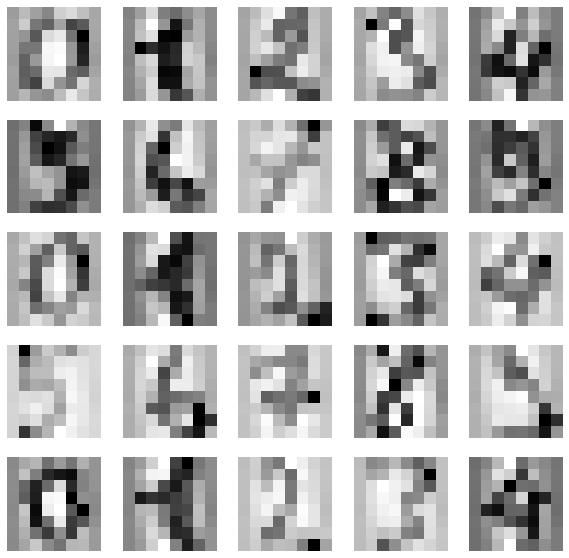

In [4]:
plt.figure(figsize= (10, 10))    
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()

You might find [this webpage](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) helpful. 

### Task 1.1: Classification with Support Vector Machines (SVM)

1. Split the data into a training and test set using the command 
```
train_test_split(X, y, random_state=1, test_size=0.8)
```
+ Use SVM with an `rbf` kernel and parameter `C=100` to build a classifier using the *training dataset*.
+ Using the *test dataset*, evaluate the accuracy of the model. Again using the *test dataset*, compute the confusion matrix. What is the most common mistake that the classifier makes? 
+ Print all of these misclassified digits as images. 
+ Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 500. What is the best value? 
+ Try to train and test the algorithm on the raw (non-scaled) data. What's your accuracy score?

In [5]:
#1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)
print(y[0])
#2
model = svm.SVC(kernel='rbf', gamma='auto', C=100)
fit = model.fit(X_train, y_train)
#3
print('Confusion Matrix:')
y_pred = model.predict(X_test)
l = np.unique(y_test)

print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred, labels = l))
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

print('homogeneity_score = ',metrics.homogeneity_score(y_test, y_pred))
print('completeness_score = ',metrics.completeness_score(y_test, y_pred))

0
Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 140   0   0  12   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   4   0   1   0   1   0   1 126   0]
 [  0   2   0   2   0   3   1   2   2 140]]
Accuracy =  0.952712100139082
homogeneity_score =  0.9025132299575656
completeness_score =  0.9025195721047304


misclassified count:  68


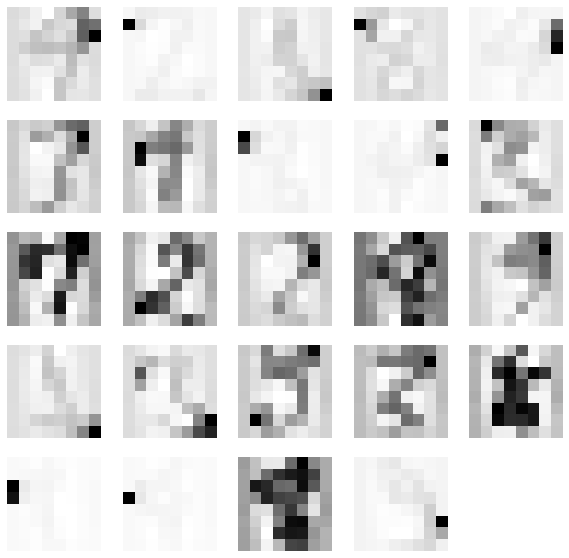

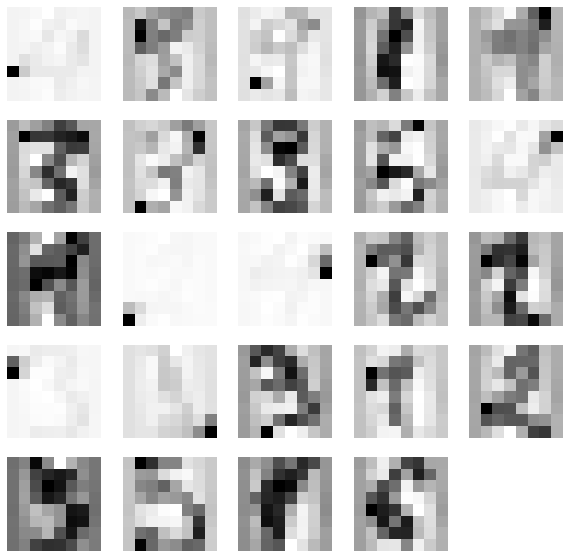

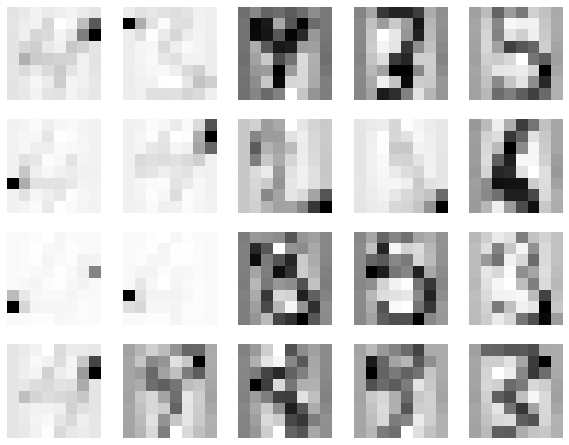

<Figure size 720x720 with 0 Axes>

In [6]:
#4 - print misclassified digits as images
x = 0;
badDigitIndecies = [];
while x < len(y_pred):
    if y_test[x] != y_pred[x]:
        badDigitIndecies.append(x)
    x += 1;

print("misclassified count: ", len(badDigitIndecies))
plt.figure(figsize= (10, 10))    
currentPlot = 0;
totalPlot = 0;
for index in badDigitIndecies:
    currentPlot +=1
    plt.subplot(5, 5,currentPlot)
    plt.imshow(np.reshape(X_test[index,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
    totalPlot += 1;
    if((currentPlot % 24) == 0 or totalPlot == len(badDigitIndecies)):
        plt.show()
        currentPlot = 0;
        plt.figure(figsize= (10, 10))

In [7]:
#Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values 
#of the parameter C between 1 and 500. What is the best value?

Cs = np.linspace(1,500,100);
cScores = [];
for c in Cs:
    cTestModel = svm.SVC(kernel='rbf', gamma='auto', C=c)
    scores = cross_val_score(estimator = cTestModel, X = X, y = y, cv=5, scoring='accuracy', n_jobs= -1)
    cScores.append(scores.mean());

print(cScores)
print ("max: ", np.amax(cScores))

cBadTestModel = svm.SVC(kernel='rbf', gamma='auto', C=2)
nonscaled = cross_val_score(estimator = cTestModel, X = digits.data, y = digits.target, cv=5, scoring='accuracy', n_jobs= -1)

print("nonscaled: ", nonscaled.mean())

[0.9487921839909685, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267, 0.9543200375707267,

**Your Interpretation**: TODO

### Task 1.2: Prediction with k-nearest neighbors
Repeat task 1.1 using k-nearest neighbors (k-NN). In part 1, use k=10. In part 3, find the best value of k. 

In [20]:
#1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)
#2
k = 10
clf = KNeighborsClassifier(n_neighbors=k)
knnModel = clf.fit(X_train, y_train)
#3
print('Confusion Matrix:')
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))
print('homogeneity_score = ', metrics.homogeneity_score( y_test, y_pred))
print('completeness_score = ', metrics.completeness_score( y_test, y_pred))


Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 137  11   0   0   0   0   0   1   0]
 [  2   4 123   2   0   0   0   2   9   0]
 [  1   0   1 133   0   1   0   6   4   1]
 [  0   0   0   0 147   0   0   4   1   0]
 [  1   1   0   2   1 136   1   0   0   5]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   1   0]
 [  0   9   1   6   0   0   0   1 115   1]
 [  5  10   0   5   1   3   2   9   8 109]]
Accuracy =  0.9123783031988874
homogeneity_score =  0.8345415766141796
completeness_score =  0.835517119844313


The most common mistake is the model thinks 1's are 2's

misclassified count:  126


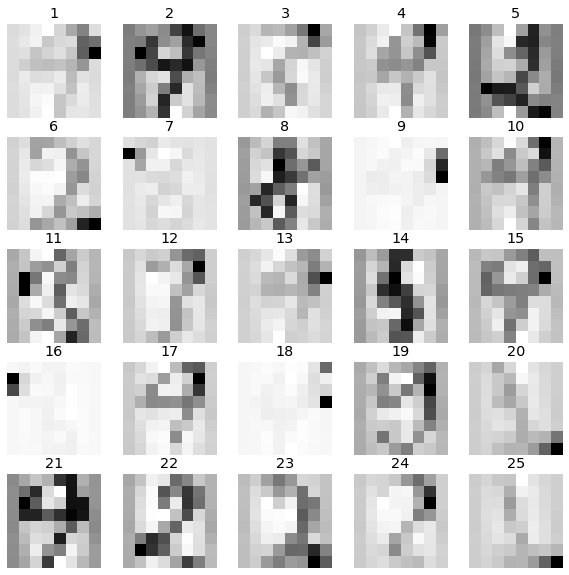

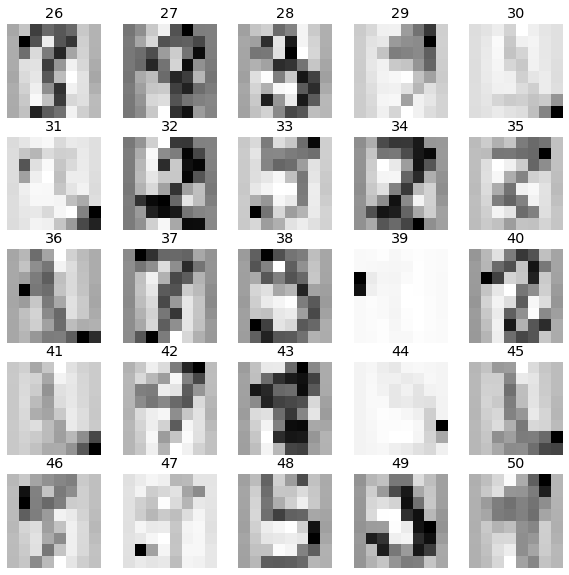

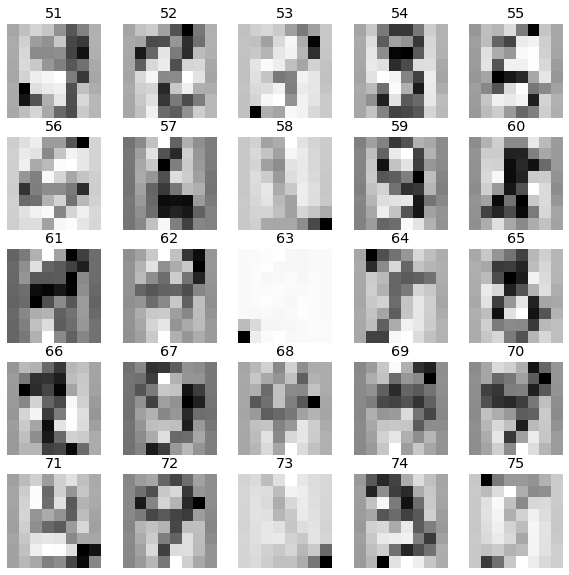

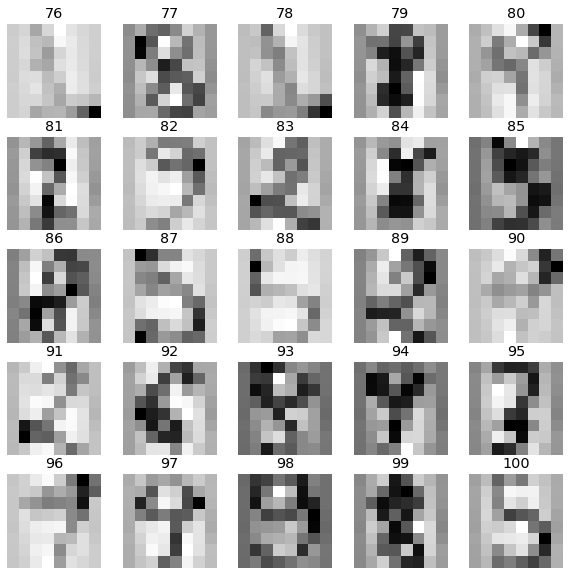

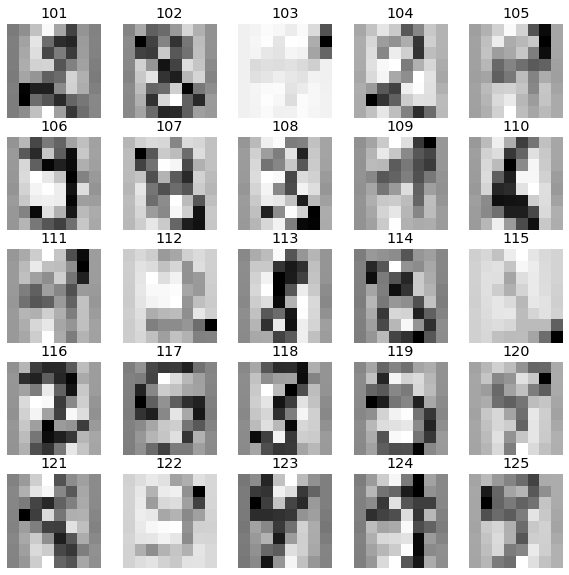

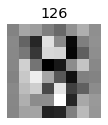

<Figure size 720x720 with 0 Axes>

In [31]:
#4 - print misclassified digits as images
x = 0;
badDigitIndecies = [];
while x < len(y_pred):
    if y_test[x] != y_pred[x]:
        badDigitIndecies.append(x)
    x += 1;

print("misclassified count: ", len(badDigitIndecies))
plt.figure(figsize= (10, 10))    
currentPlot = 0;
totalPlot = 0;
for index in badDigitIndecies:
    currentPlot +=1
    plt.subplot(5, 5,currentPlot)
    fig = plt.gcf()
    ax = plt.gca()
    plt.imshow(np.reshape(X_test[index,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
    totalPlot += 1;
    ax.set_title(totalPlot)
    if((currentPlot % 25) == 0 or totalPlot == len(badDigitIndecies)):
        plt.show()
        currentPlot = 0;
        plt.figure(figsize= (10, 10))

In [40]:
#5
#Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values 
#of the parameter C between 1 and 500. What is the best value?

Ks = np.linspace(1,500,100,dtype=int);
CVScores = [];
bestK = 0;
currentMax = 0;
for k in Ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator = clf, X = X, y = y, cv=5, scoring='accuracy', n_jobs= -1)
    CVScores.append(scores.mean());
    if scores.mean() > currentMax:
        bestK = k
        currentMax = scores.mean()

print(CVScores)
print ("max: ", np.amax(CVScores))
print ("current max: ", currentMax)
print( "bestK: ", bestK)

badClf = KNeighborsClassifier(n_neighbors=bestK)
nonscaled = cross_val_score(estimator = badClf, X = digits.data, y = digits.target, cv=5, scoring='accuracy', n_jobs= -1)

print("nonscaled: ", nonscaled.mean())

[0.9433193524140924, 0.9449625045302066, 0.9388988739717146, 0.9333721834645164, 0.9266482283038755, 0.920553737808995, 0.9172248909496835, 0.9161105705514896, 0.9149620218004195, 0.9110668318409989, 0.9121857402325284, 0.9077425604078245, 0.904973966521035, 0.9032995714697506, 0.900505947816043, 0.8943650951853117, 0.8932351784298772, 0.8893829533069338, 0.887160533223881, 0.8854937555207277, 0.8838545672918485, 0.881092215456197, 0.8760437657117063, 0.8754804708171904, 0.8732765119554244, 0.8727145923579016, 0.8693888451863561, 0.866602994600924, 0.8655197689628386, 0.864947040658645, 0.8627154219896344, 0.859391100335771, 0.8610518356450207, 0.8560698997074766, 0.8599562615125225, 0.8555097610050151, 0.852731819095722, 0.8493484954835872, 0.8465594535396157, 0.8465257224555816, 0.8437553476737307, 0.8415390842546415, 0.8393244372398646, 0.8376452758758133, 0.8365369413672346, 0.8326215859080357, 0.83040062650915, 0.8298328352920722, 0.8270517723572102, 0.8270593394846524, 0.82204195

# Part 2: Popularity of online news

For this problem, you will use classification tools to predict the popularity of online news based on attributes such as the length of the article, the number of images, the day of the week that the article was published, and some variables related to the content of the article. You can learn details about the datasetat the
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). 
This dataset was first used in the following conference paper: 

K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. *Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence* (2015).

The dataset contains variables describing 39,644 articles published between January 7, 2013 and Januyary 7, 2015 on the news website, [Mashable](http://mashable.com/). 
There are 61 variables associated with each article. Of these, 58 are *predictor* variables, 2 are variables that we will not use (url and timedelta), and finally the number of shares of each article. The number of shares is what we will use to define whether or not the article was *popular*, which is what we will try to predict. You should read about the predictor variables in the file *OnlineNewsPopularity.names*. Further details about the collection and processing of the articles can be found in the conference paper. 


### Task 2.1 Import the data 
* Use the pandas.read_csv() function to import the dataset.
* To us[scikit-learn](http://scikit-learn.org), we'll need to save the data as a numpy array. Use the *DataFrame.as_matrix()* command to export the predictor variables as a numpy array called *X* this array should not include our target variable (the number of shares). We don't need the url and timedelta, so let's drop these columns. 
* Export the number of shares as a separate numpy array, called *shares*. We'll define an article to be popular if it received more shares than the median number of shares. Create a binary numpy array, *y*, which indicates whether or not each article is popular.

In [16]:
# Your code here.  Note the data and description are in the OnlineNewsPopularity directory
data = pd.read_csv("OnlineNewsPopularity/OnlineNewsPopularity.csv")
newsData =data.drop(columns=[" timedelta", 'url', ' shares'])
X = scale(newsData.as_matrix())
sharesP = data[" shares"]
shares = data[" shares"].to_numpy()
medianShares = np.median(shares)
Y = []

for val in shares:
    if val > medianShares:
        Y.append(1)
    else:
        Y.append(0)

Y = np.asarray(Y)
print(y)
print(newsData[' n_tokens_title'].count())
print(X)

[0 1 2 ... 8 9 8]
39644
[[ 0.75744723 -0.69521045  0.03277187 ... -0.97543219 -1.81071884
   0.13891975]
 [-0.66165665 -0.61879381  0.01605588 ... -0.26907618  0.83774863
  -0.68965812]
 [-0.66165665 -0.71219192  0.00764453 ... -0.26907618  0.83774863
  -0.68965812]
 ...
 [-0.18862202 -0.2218518  -0.00904959 ...  0.24463729 -1.56994907
  -0.08705603]
 [-2.08076053  0.28759248 -0.00247749 ... -0.26907618  0.83774863
  -0.68965812]
 [-0.18862202 -0.82681689  0.04367671 ...  0.67273184 -0.92789635
   0.41511238]]


/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


### Task 2.2 Exploratory data analysis 

First check to see if the values are reasonable. What are the min, median, and maximum number of shares? 

In [14]:
print("Median", np.median(shares))
print("max", np.max(shares))
print("min", np.min(shares))

Median 1400.0
max 843300
min 1


### Task 2.3 Classification using k-NN

Develop a k-NN classification model for the data. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data? 

In [138]:
Ks = np.linspace(1,500,100,dtype=int);
accuracyScores = [];
bestK = 0;
currentBestAccuracy = 0;
for k in Ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator = clf, X = X, y = Y, cv=5, scoring='accuracy', n_jobs= -1)
    accuracyScores.append(scores.mean());
    if scores.mean() > currentBestAccuracy:
        bestK = k
        currentBestAccuracy = scores.mean()

print(accuracyScores)
print ("max: ", np.amax(accuracyScores))
print ("current max: ", currentBestAccuracy)
print( "bestK: ", bestK)

[0.5677538514982892, 0.5975694173157408, 0.6187836620377852, 0.6197166618100101, 0.62287011858301, 0.621987025728403, 0.6248882438796585, 0.6247367925452656, 0.6273350571282782, 0.6261746194947465, 0.6279404934447863, 0.6264270108148622, 0.6282180354591068, 0.6281170127617663, 0.6287981556581745, 0.6267548287678641, 0.6288232490904904, 0.628142201630564, 0.6283692322962144, 0.6274610905463166, 0.6264016756101254, 0.6253421207004275, 0.6268555715181908, 0.6261491888535279, 0.6272590960510929, 0.6274609442103777, 0.6258212563767476, 0.6278142246167588, 0.6269060637795647, 0.6280159328025368, 0.6274104455865717, 0.6285707750587571, 0.6275365744410921, 0.6283689268994723, 0.6277635923818783, 0.6285959130280977, 0.6281924139449243, 0.6287977929995432, 0.6275870412527375, 0.6281924712068133, 0.627511417384455, 0.6282428680317053, 0.6276375462389755, 0.6284195718592172, 0.6278897784982879, 0.629024893651947, 0.628923890041903, 0.6283690414232506, 0.6281924203073563, 0.6282932966687578, 0.6286

The model above uses k-fold cross validation to determine accuracy of the KNN model. The data is sorted into 5 sections. The data in each other section is used to train the model and data in the current section is used to test. I tested 100 values for K between 1 and 500 and the highest accuracy was achieved with a k of 333. 

### Task 2.4 Classification using SVM

Develop a support vector machine classification model for the data. 
 
 * SVM is computationally expensive, so start by using only a fraction of the data, say 5,000 articles. 
 * Experimt with different Cs. Which is the best value for C?

Note that it takes multiple minutes per value of C to run on the whole dataset!

In [23]:
smlX = X#[:5000]
smlY = Y#[:5000]

print("smlX", len(smlX))
print("smlY", len(smlY))

print(smlY[:10])
# Cs = np.linspace(1, 500,100,dtype=int);
# accuracy = [];
# bestC = 0;
# currentMax = 0;
# for c in Cs:
#     clf = svm.SVC(kernel='rbf', gamma='auto', C=c)
#     scores = cross_val_score(estimator = clf, X = smlX, y = smlY, cv=5, scoring='accuracy', n_jobs= -1)
#     accuracy.append(scores.mean());
#     print(c , scores.mean())
#     if scores.mean() > currentMax:
#         bestC = c
#         currentMax = scores.mean()


# print(accuracy)
# print ("max: ", np.amax(accuracy))
# print ("current max: ", currentMax)
# print( "bestC: ", bestC)

clf = svm.SVC(kernel='rbf', gamma='auto', C=1)
scores = cross_val_score(estimator = clf, X = smlX, y = smlY, cv=5, scoring='accuracy', n_jobs= -1)
print(scores.mean())

smlX 39644
smlY 39644
[0 0 1 0 0 0 0 0 1 0]
0.6338448304602711


In [20]:
from IPython.display import Image, display  
import pydotplus 
from scipy import misc

def renderTree(my_tree, features):
    # hacky solution of writing to files and reading again
    # necessary due to library bugs
    filename = "temp.dot"
    with open(filename, 'w') as f:
        f = tree.export_graphviz(my_tree, 
                                 out_file=f, 
                                 feature_names=features, 
                                 
                                 filled=True, 
                                 rounded=True,
                                 special_characters=True)
  
    dot_data = ""
    with open(filename, 'r') as f:
        dot_data = f.read()

    graph = pydotplus.graph_from_dot_data(dot_data)
    image_name = "temp.png"
    graph.write_png(image_name)  
    display(Image(filename=image_name))

In [26]:
def splitData(features):
    predictors =newsData[features].as_matrix()
    labels = Y
    
    # Split into training and test sets
    XTrain, XTest, yTrain, yTest = train_test_split(predictors, labels, random_state=1, test_size=0.5)
    return XTrain, XTest, yTrain, yTest

### Task 2.5 Classification using decision trees

Develop a decision tree classification model for the data. 

Use cross validation to choose good values of the max tree depth (*max_depth*) and minimum samples split (*min_samples_split*). 

/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


19822
Accuracy on training data =  0.6584098476440319
Accuracy on test data =  0.639592372111795


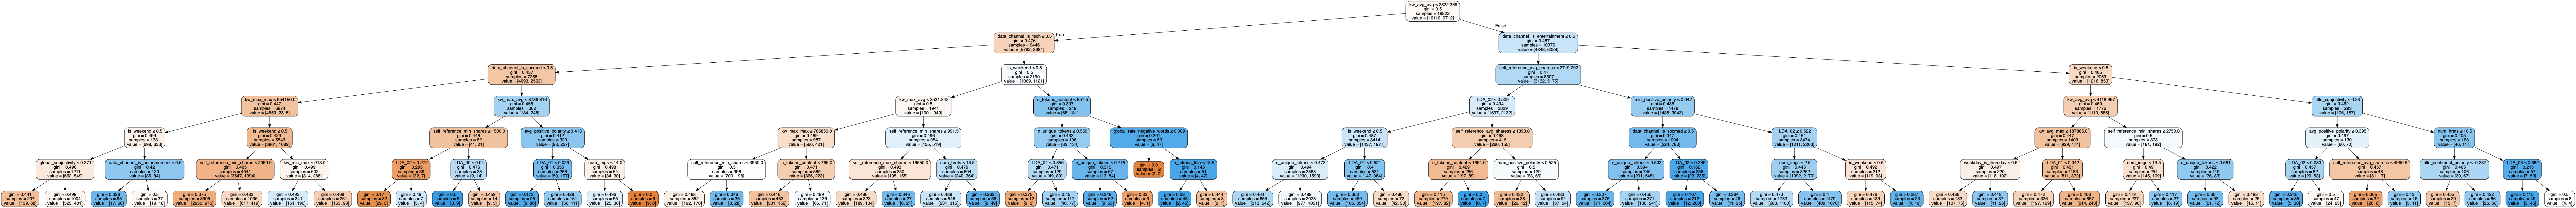

Accuracy on training DT2 training =  0.6575017657148623
Accuracy on test DT2 testing =  0.6344970235092322


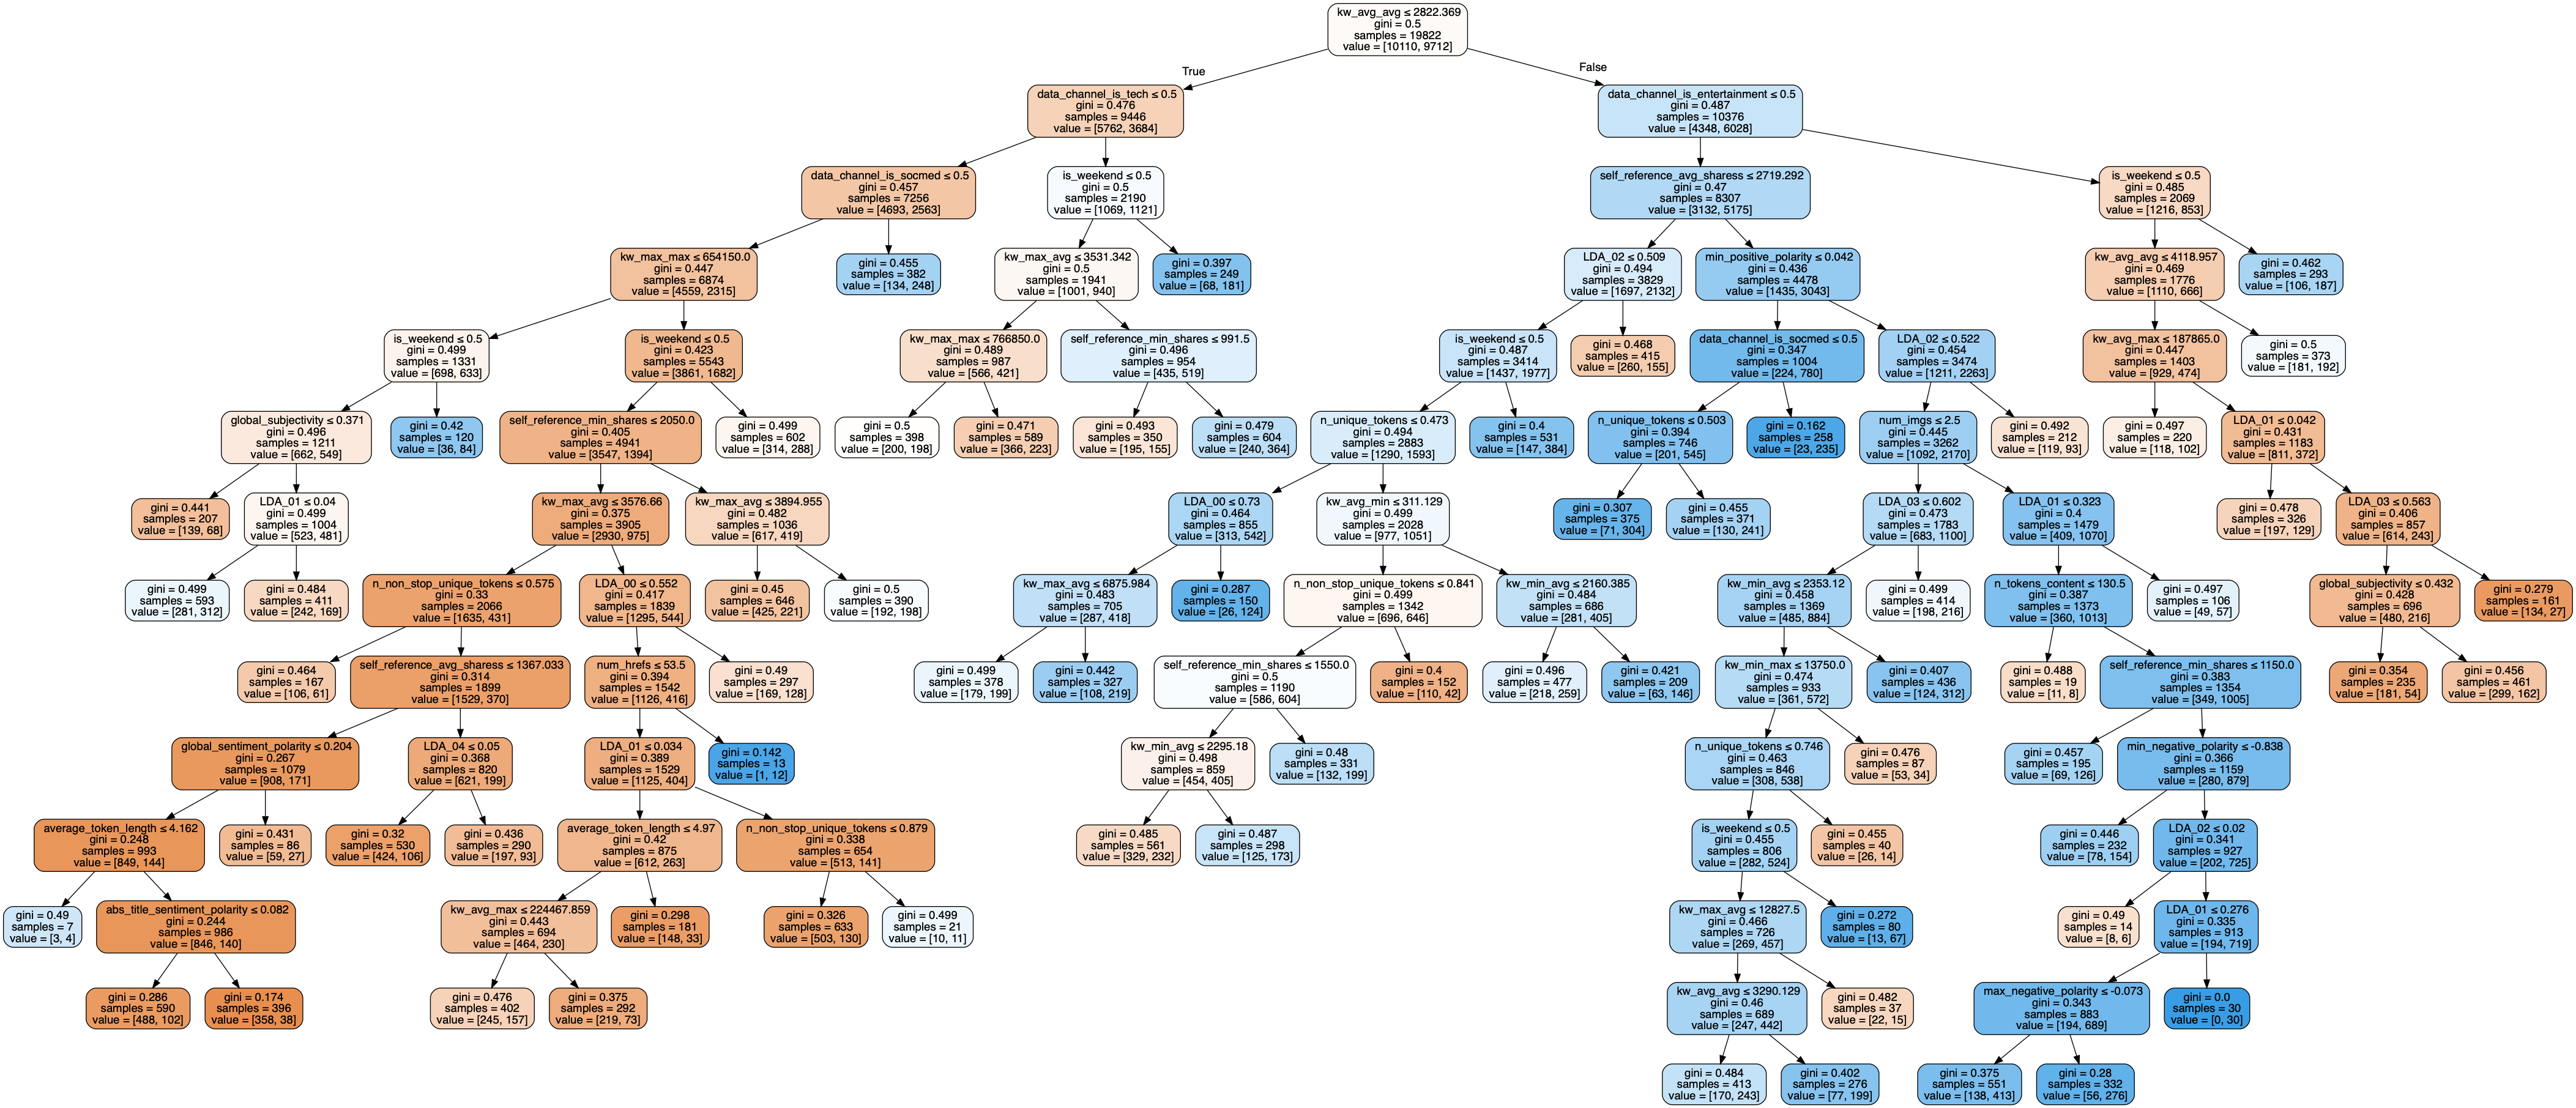

In [39]:
features = newsData.columns
X_train, X_test, y_train, y_test = splitData(features)
print(len(X_train))
decisionTree = tree.DecisionTreeClassifier(max_depth = 6)
decisionTree = decisionTree.fit(X_train, y_train)

# predict with the training data
y_pred_train = decisionTree.predict(X_train)
print('Accuracy on training data = ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))

# predict with the test data
y_pred = decisionTree.predict(X_test)
print('Accuracy on test data = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

renderTree(decisionTree, features)

decisionTree2 = tree.DecisionTreeClassifier(min_samples_split= 650)
decisionTree2 = decisionTree2.fit(X_train, y_train)
y_pred_train = decisionTree2.predict(X_train)
print('Accuracy on training DT2 training = ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))
# predict with the test data
y_pred = decisionTree2.predict(X_test)
print('Accuracy on test DT2 testing = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

renderTree(decisionTree2, features)

### Task 2.6 Describe your findings
1. Which method (k-NN, SVM, Decision Tree) worked best?
+ How did different parameters influence the accuracy?
+ Which model is easiest do interpret?
+ How would you interpret your results?


### Which method worked the best?
From my analysis above the svm model seems to work the best as they had the highest accuracy.<br>
**KNN**<br>
max:  0.6299836040124042<br>
bestK:  333<br>

**SVM**<br>
max:  0.6338448304602711<br>
bestC:  1<br>

**Decision Tree**<br>
max: 0.639592372111795<br>
maxDepth: 4<br>

### How different Params influnce accuracy

#### KNN
The value that influenced accuracy the most in KNN was k. Lower values of K have a higher bias because we only a small number of points are allowed to vote. If we only use a k of 1, the could be an outlier and our model would still try to bend our line to include that value causing us to overfit. As the number of k grows, we are able to smooth out our line. If we go too far, we then start underfitting and we're not taking account useful variations in our data. I checked 500 possible values for k and found the best k to be 333.

#### SVM
The value that influences accuracy in the SVM was C or the budget value. The larger the value of C, the less sensitive we are to our data because we're taking more points into account. Again I tried 100 values between 1 and 500. The value of 1 seems to give the highest accuracy. I'm a little skeptical of this number because it feels like it could potentially overfit the data but the data seems to suggest otherwise.

#### Decision Tree
To prevent overfitting, I used accuracy measurements to select a minium sample split value which is just the minimum number of samples required to split a node. I also used the max depth variable with limited the depth of the tree to prevent it from splitting on too many attributes. This dramatically improved the the accuracy of the testing data set. 

### Which model is easiest to interpret?
If the decision was probably be the easiest to interpret because of the nice visualization. It makes it easy to see which attribute the node was split on and gives the gini or the "pureness" measure for each node which tells us what percentage of nodes are the same class. 

### How would you interpret your results?
If we use our SVM or decision tree models, we can accurately predict whether an article will get more than the median shares roughly 63% of the time. The decision tree gives us further information on which attributes are the best predictors because we typically split on the best predictors first. This could give us a loose idea of which factors are the most significant in creating our decision tree model. 

